# Basic highway environment test

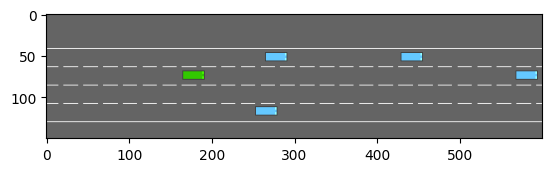

In [2]:
import gymnasium
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gymnasium.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(3):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

In [3]:
import pprint
pprint.pprint(env.unwrapped.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


Change lanes for example

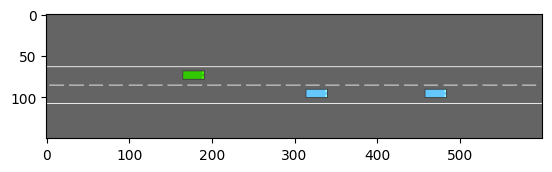

In [4]:
env.unwrapped.config["lanes_count"] = 2
env.reset()
plt.imshow(env.render())
plt.show()

Change lanes at creation

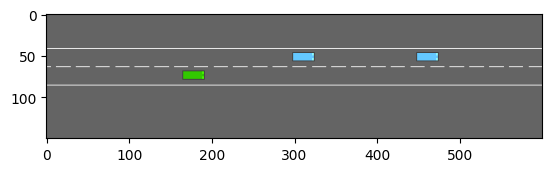

In [6]:
env = gymnasium.make('highway-v0', render_mode='rgb_array', config={"lanes_count": 2})
env.reset()
plt.imshow(env.render())
plt.show()


# For handling environment errors

In [ ]:
import highway_env
highway_env.register_highway_envs()

# Training & Saving DQN agent

In [8]:
import gymnasium
import highway_env
from stable_baselines3 import DQN

env = gymnasium.make('highway-fast-v0', render_mode='rgb_array', config={"lanes_count": 2})
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,)
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.25     |
|    ep_rew_mean      | 5.97     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 52       |
|    time_elapsed     | 0        |
|    total_timesteps  | 33       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 8.77     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 56       |
|    time_elapsed     | 1        |
|    total_timesteps  | 97       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 8.65   

/opt/anaconda3/envs/highway_env/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path 'highway_dqn' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


AttributeError: 'NoneType' object has no attribute 'get_image'